

# CMSC 478 Machine Learning
## Fereydoon Vafaei
Some examples from [matplotlib](https://matplotlib.org/) library and Minwoo Lee (UNCC) Materials
#### September 2019

<br>

## Workbook - Data Preprocessing and Visualization

#### Data Preprocessing


As discussed in the lectures, a good portion of ML projects time is spent on getting, cleaning, preparing, and - in general - "Preprocessing the data. In Chapter 2 of Hands-On ML Textbook, there is a link to some famous public data set repositories for ML pratices. Among them is [UCI repository](https://archive.ics.uci.edu/ml/index.php) from which we may use a few examples in our class. So, let's play with one of the UCI repository datasets named: Forest Fires Data Set. Download the data from this link. Download link is at the thop of the page.

https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!head -30 forestfires.csv

In [ ]:
!tail -30 forestfires.csv

In [ ]:
!tail -20 forestfires.names

>Let's read the forestfires data using pandas. As mentioned in class, pandas dataframes can organize data very well and provide you with a lot of built-in functions to work with dataframes. [`pandas.read_csv` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) is used to read comma separated values (csv) files.

In [ ]:
df = pd.read_csv("forestfires.csv")
df

> [`pandas.isnull()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) is used to check whether values are missing (`NaN` in numeric arrays, `None` or `NaN` in object arrays, `NaT` in datetimelike).

In [ ]:
df.isnull()

> You can always get help about the syntax and functionality of these methods, simply by placing a question mark `?` right after them.

In [ ]:
df.isnull?

In [ ]:
np.any?

In [ ]:
np.any(df.isnull())

> Now let's compare pandas with numpy in reading csv files.

In [ ]:
dat = np.loadtxt("forestfires.csv")

In [ ]:
monthdic = {b'jan': 1, b'feb':2, b'mar':3, b'apr':4, b'may':5, b'jun':6, 
            b'jul': 7, b'aug':8, b'sep':9, b'oct':10, b'nov': 11, b'dec': 12}
daydic = {b'mon': 1, b'tue':2, b'wed':3, b'thu':4, b'fri':5, b'sat':6, b'sun':7 }

def month_conv(s):
    return monthdic[s]

def day_conv(s):
    return daydic[s]


dat = np.loadtxt("forestfires.csv", delimiter=',', skiprows=1,
                 converters={2:month_conv, 3:day_conv})

dat

In [ ]:
# Or you may use lambda function 
dat = np.loadtxt("forestfires.csv", delimiter=',', skiprows=1, 
                 converters={2: lambda x: monthdic[x], 3: lambda x: daydic[x]})
dat

In [ ]:
np.isnan(dat)

In [ ]:
np.any(np.isnan(dat))

In [ ]:
df.head()

In [ ]:
df.columns.values

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.loc[:, 'area']

In [ ]:
plt.plot(df.loc[:, 'area'])

In [ ]:
plt.hist(df.loc[:, 'area'])

In [ ]:
df.describe()

In [ ]:

T = df.loc[:, 'area'].copy()
T

In [ ]:
X = df.iloc[:, :-1].copy()
X

In [ ]:
# forgot conversion of string
monthdic = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
            'jul': 7, 'aug':8, 'sep':9, 'oct':10, 'nov': 11, 'dec': 12}
daydic = {'mon': 1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7 }

X['month'] = X['month'].apply(lambda x: monthdic[x])
X['day'] = X['day'].apply(lambda x: daydic[x])
X

In [ ]:
# Visualizing the data in a more traditional way

fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Area')
fig.tight_layout()

In [ ]:
# Try with Pandas plots

D = pd.concat([X, T], axis=1)
D

In [ ]:

fig, axes = plt.subplots(3,4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i,c  in enumerate(X.columns.values):
    D.iloc[:, i].plot(y=c, ax=axes[int(i/4), i%4])
    axes[int(i/4), i%4].set_ylabel(c)
fig.tight_layout()

In [ ]:
def area_scatter():
    fig, axes = plt.subplots(3,4)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    for i,c  in enumerate(X.columns.values):
        #D.plot.hexbin(c, 'area', ax=axes[int(i/4), i%4])
        D.plot.scatter(c, 'area', ax=axes[int(i/4), i%4])
    fig.tight_layout()
    
area_scatter()

In [ ]:
T.plot.hist()

In [ ]:
np.log(T.iloc[0])

In [ ]:
Tlog = T.copy()
Tlog = T.apply(lambda x: np.log(x+1))

In [ ]:
pd.concat([T, Tlog], axis=1)

In [ ]:
Tlog.hist()

In [ ]:
D = pd.concat([X, Tlog], axis=1)
D

In [ ]:
area_scatter()

#### matplotlib library demos

[matplotlib library](https://matplotlib.org/) has some really cool capabilities in plotting and visualizing data. Let's see some interesting demos from matplotlib library. By the way, look up the inline magic command [`%matplotlib inline` documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) to know more why it's used.

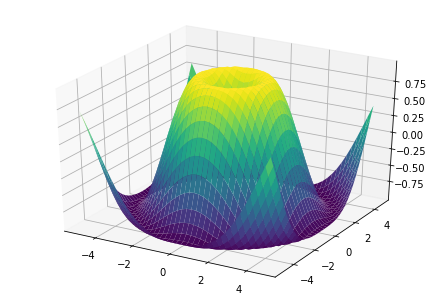

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

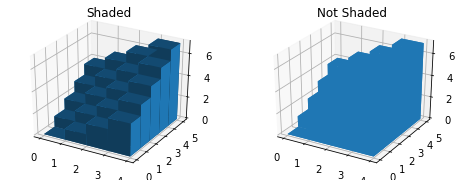

In [4]:
#from matplotlib library https://matplotlib.org/

import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

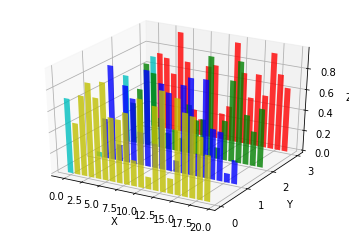

In [5]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()


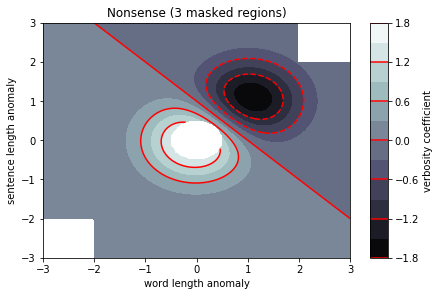

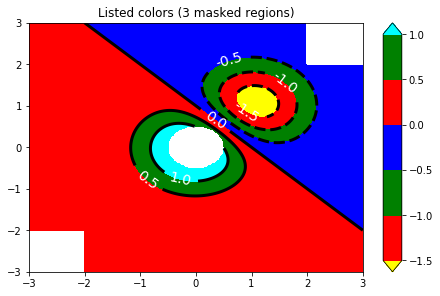

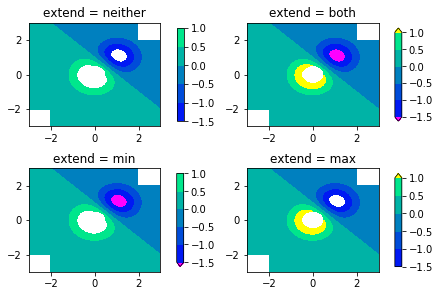

In [6]:
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr // 6:, -nc // 6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr // 6, :nc // 6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt(X**2 + Y**2) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.

fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

fig2, ax2 = plt.subplots(constrained_layout=True)
# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = ax2.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = ax2.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
ax2.set_title('Listed colors (3 masked regions)')
ax2.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
fig2.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2, constrained_layout=True)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()

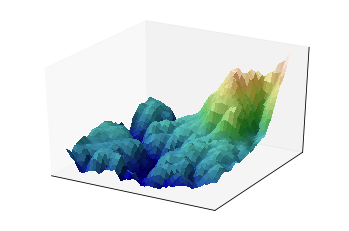

In [7]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

with cbook.get_sample_data('jacksboro_fault_dem.npz') as file, \
     np.load(file) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.savefig("surface3d_frontpage.png", dpi=25)  # results in 160x120 px image